Data Science Fundamentals: R |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 16. [Exploratory Data Analysis Using Models](./00.ipynb) | [Model Basics](./01.ipynb) | [Model Building](./02.ipynb) | [Exercises](./03.ipynb)

# Exploratory Data Analysis Using Models with R

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



![images](images/slides1.png)

In [2]:
library(ggplot2)

![images](images/slides2.png)

In [3]:
library(nycflights13)

Warning message:
"package 'nycflights13' was built under R version 3.6.3"

In [4]:
flights

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1      2013 1     1   517      515             2         830      819          
2      2013 1     1   533      529             4         850      830          
3      2013 1     1   542      540             2         923      850          
4      2013 1     1   544      545            -1        1004     1022          
5      2013 1     1   554      600            -6         812      837          
6      2013 1     1   554      558            -4         740      728          
7      2013 1     1   555      600            -5         913      854          
8      2013 1     1   557      600            -3         709      723          
9      2013 1     1   557      600            -3         838      846          
10     2013 1     1   558      600            -2         753      745          
11     2013 1     1   558      600            -2         849      851          
12     2013 1     1   558      600            -2         853      856          
13     2013 1     1   558      600            -2         924      917          
14     2013 1     1   558      600            -2         923      937          
15     2013 1     1   559      600            -1         941      910          
16     2013 1     1   559      559             0         702      706          
17     2013 1     1   559      600            -1         854      902          
18     2013 1     1   600      600             0         851      858          
19     2013 1     1   600      600             0         837      825          
20     2013 1     1   601      600             1         844      850          
21     2013 1     1   602      610            -8         812      820          
22     2013 1     1   602      605            -3         821      805          
23     2013 1     1   606      610            -4         858      910          
24     2013 1     1   606      610            -4         837      845          
25     2013 1     1   607      607             0         858      915          
26     2013 1     1   608      600             8         807      735          
27     2013 1     1   611      600            11         945      931          
28     2013 1     1   613      610             3         925      921          
29     2013 1     1   615      615             0        1039     1100          
30     2013 1     1   615      615             0         833      842          
...    ...  ...   ... ...      ...            ...       ...      ...           
336747 2013 9     30  2123     2125            -2       2223     2247          
336748 2013 9     30  2127     2129            -2       2314     2323          
336749 2013 9     30  2128     2130            -2       2328     2359          
336750 2013 9     30  2129     2059            30       2230     2232          
336751 2013 9     30  2131     2140            -9       2225     2255          
336752 2013 9     30  2140     2140             0         10       40          
336753 2013 9     30  2142     2129            13       2250     2239          
336754 2013 9     30  2145     2145             0        115      140          
336755 2013 9     30  2147     2137            10         30       27          
336756 2013 9     30  2149     2156            -7       2245     2308          
336757 2013 9     30  2150     2159            -9       2250     2306          
336758 2013 9     30  2159     1845           194       2344     2030          
336759 2013 9     30  2203     2205            -2       2339     2331          
336760 2013 9     30  2207     2140            27       2257     2250          
336761 2013 9     30  2211     2059            72       2339     2242          
336762 2013 9     30  2231     2245           -14       2335     2356          
336763 2013 9     30  2233     2113            80        112       30          
336764 2013 9     30  2235     2001           154         59     2249          
336765 

![images](images/slides3.png)

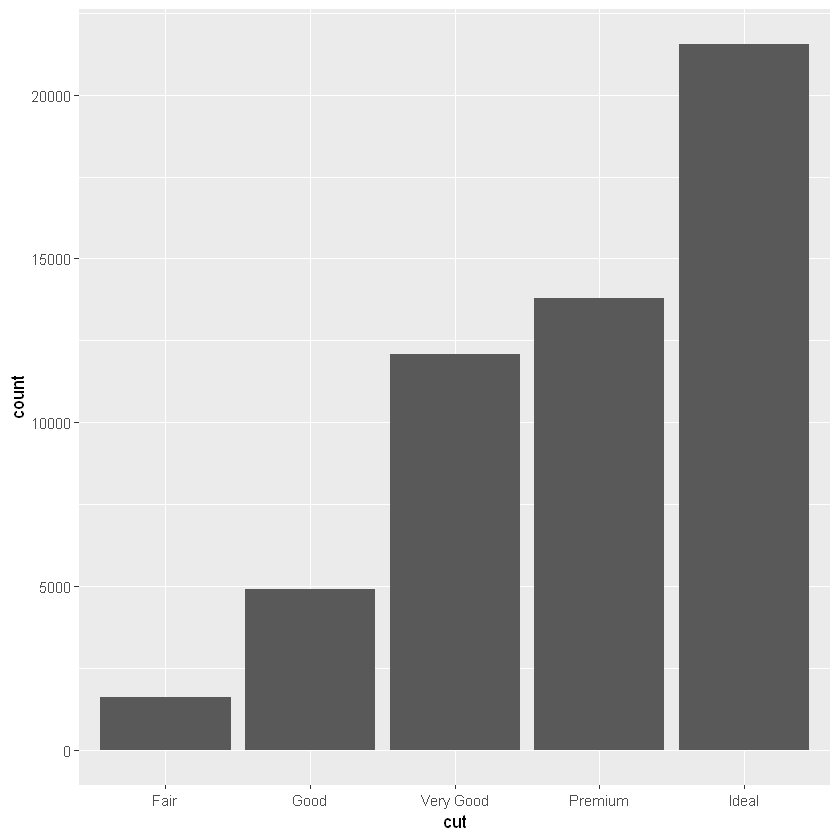

In [5]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut))

## Variation of a Continous Variable

To examine the distribution of a continous variable, use a histogram:

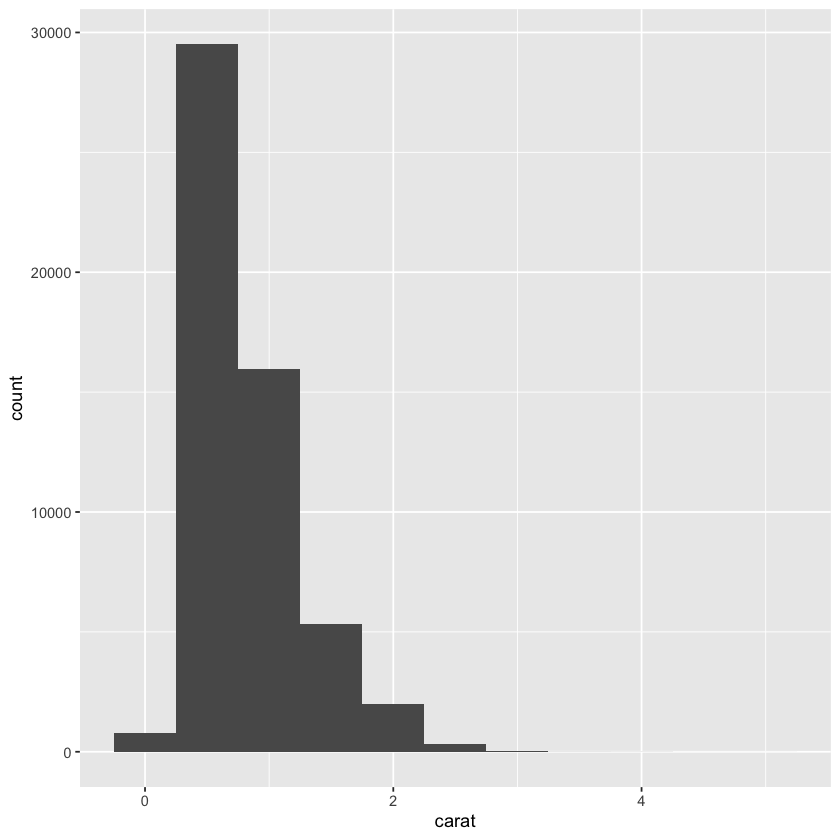

In [6]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x=carat), binwidth = 0.5)

In [7]:
# you can also compute this by hand with
diamonds %>% count (cut_width(carat, 0.5))

cut_width(carat, 0.5) n    
1  [-0.25,0.25]            785
2  (0.25,0.75]           29498
3  (0.75,1.25]           15977
4  (1.25,1.75]            5313
5  (1.75,2.25]            2002
6  (2.25,2.75]             322
7  (2.75,3.25]              32
8  (3.25,3.75]               5
9  (3.75,4.25]               4
10 (4.25,4.75]               1
11 (4.75,5.25]               1

## Changing the Resolution of a Histogram

Set the width of the intervals with the binwidth argument.

We can also zoom in to focus on smaller diamonds.

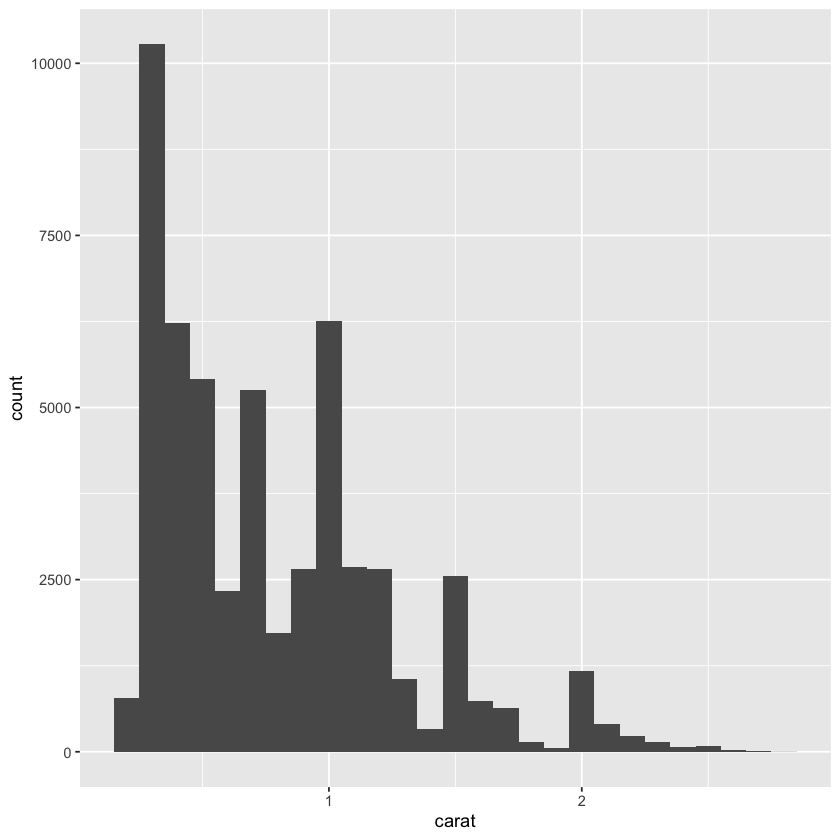

In [10]:
diamonds %>% filter(carat < 3) %>%
  ggplot(aes(x = carat)) + geom_histogram(binwidth = 0.1)

## Identifying Typical Values

Look for anything unexpected:
- Which values are the most common? Why?
- Which values are rare?  Why?  Does that match your expectations?
- Can you see any unusual patterns?  What might explain them?

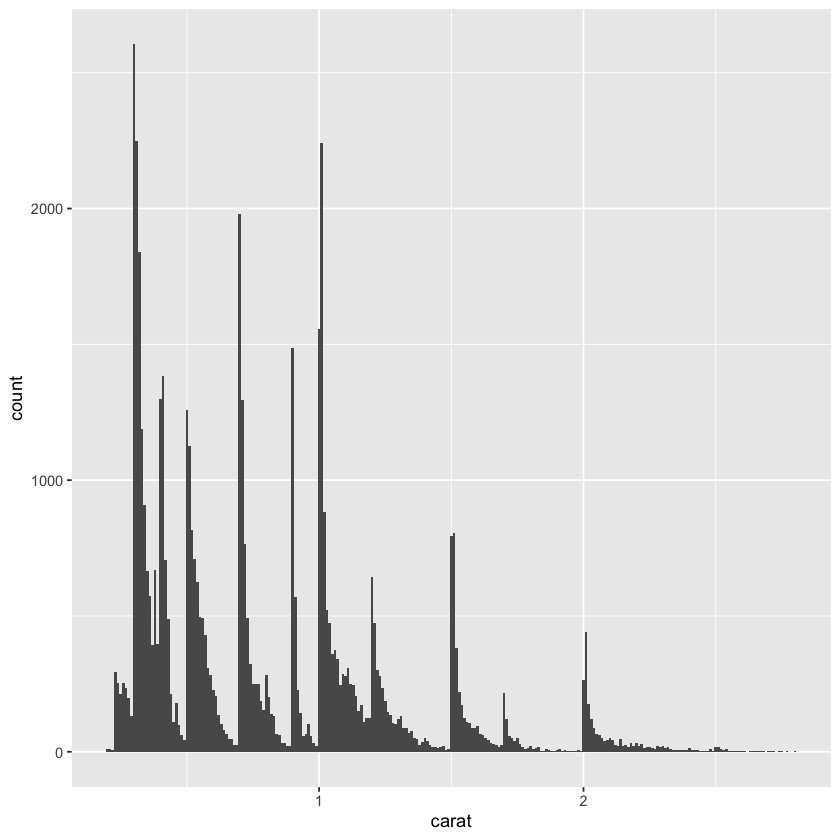

In [11]:
diamonds %>% filter(carat < 3) %>%
  ggplot(aes(x=carat)) + geom_histogram(binwidth = 0.01)

## Identifying Unusual Values

Outliers are unusual observations: points that don't seem to fit the pattern.

Sometimes outliers are entry errors; other times they can be interesting.

Outliers are sometimes difficult to see in a histogram.

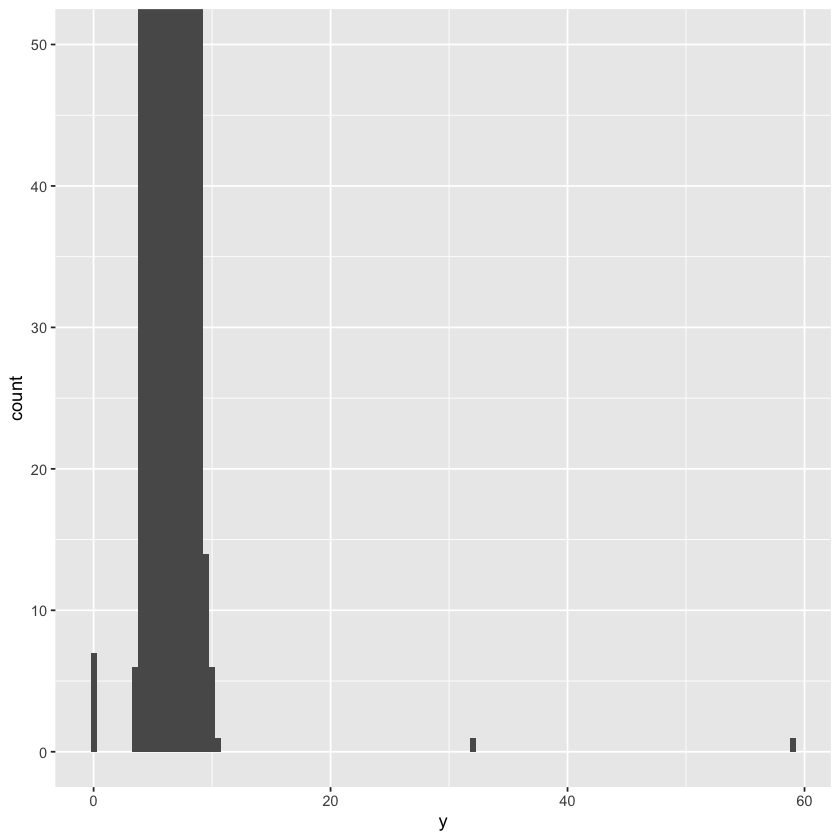

In [13]:
# solution: zoom in on the vertical axis
ggplot(diamonds) + geom_histogram(mapping = aes(x=y), binwidth = 0.5) +
   coord_cartesian(ylim = c(0,50))

## Identifying Outliers

Now that we have seen the usual values, we can try to understand them.

In [15]:
diamonds %>% filter(y < 3 | y > 20) %>%
  select(price, carat, x, y, z) %>% arrange(y)

price carat x    y    z   
1  5139 1.00  0.00  0.0 0.00
2  6381 1.14  0.00  0.0 0.00
3 12800 1.56  0.00  0.0 0.00
4 15686 1.20  0.00  0.0 0.00
5 18034 2.25  0.00  0.0 0.00
6  2130 0.71  0.00  0.0 0.00
7  2130 0.71  0.00  0.0 0.00
8  2075 0.51  5.15 31.8 5.12
9 12210 2.00  8.09 58.9 8.06

The y variable measures one of the three dimensions, in mm.

Therefore, these must be entry errors!  Why?

It's good practice to repeat your analysis with and without outliers.

## Adding Missing Values

When you encounter usuual values, you have two options
- Drop the entire row with the strange values

In [16]:
diamonds2 <- diamonds %>% filter(between(y, 3, 20))

- Replace the unusual values with missing values:x

In [17]:
diamonds2 <- diamonds %>% mutate(y = ifelse(y < 3 | y > 20, NA, y))

```ggplot``` will issue a warning when you plot with missing values.  Note the use of function ```ifelse```

## Understanding Missing Values

What makes observations with missing values different?

For example, in ```flights```, missing ```dep_time``` for cancelled flights.

Warning message:
“Transformation introduced infinite values in continuous y-axis”


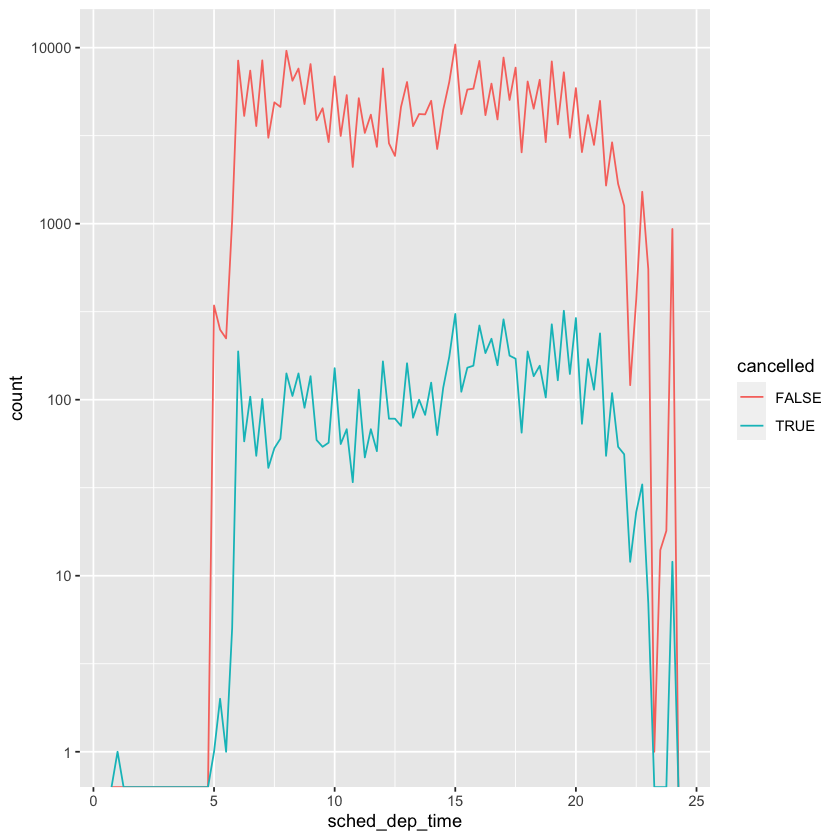

In [21]:
# compare scheduled departure times for cancelled and non-cancelled times.
nycflights13::flights %>% mutate(cancelled = is.na(dep_time),
                                 sched_hour=sched_dep_time%/%100, sched_min=sched_dep_time%%100,
                                 sched_dep_time=sched_hour+sched_min/60) %>% ggplot(aes(sched_dep_time)) + scale_y_log10() +
                          geom_freqpoly(aes(color=cancelled), binwidth=1/4)

## Covariation

Tendency for the values of two or more variables to vary together.

Two continous variables: draw a scatterplot with ```geom_point()```.

Example: ```diamond dataset```

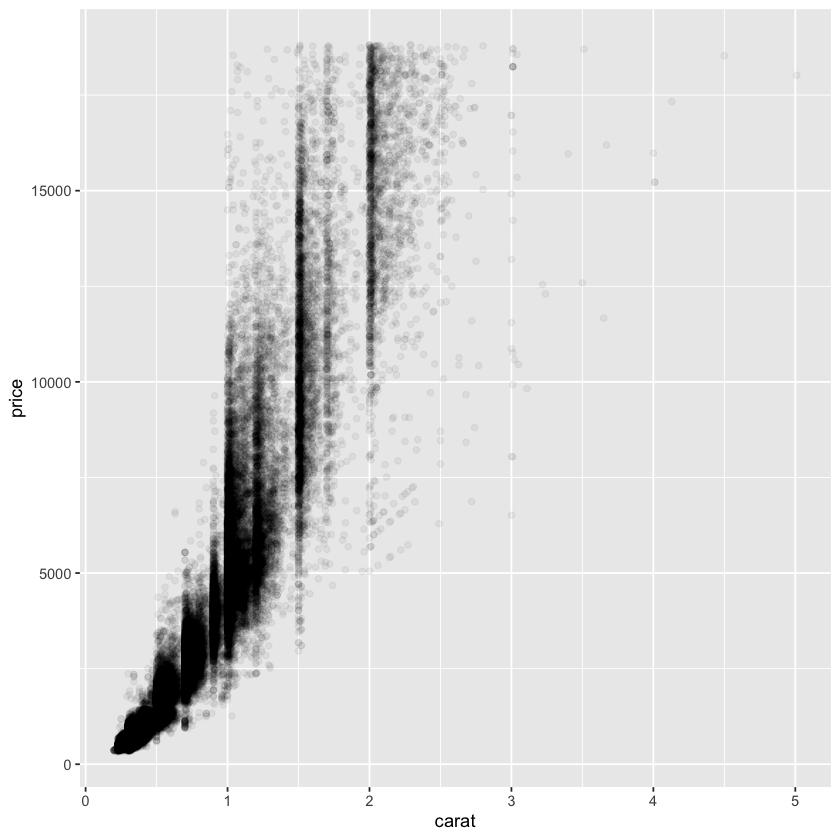

In [22]:
ggplot(data = diamonds) + geom_point(aes(x=carat, y=price), alpha=0.05)

![images](images/slides4.png)

## Categorical and a Continous Variable

To display the covariation between categorical and a continous variable: use a boxplot.

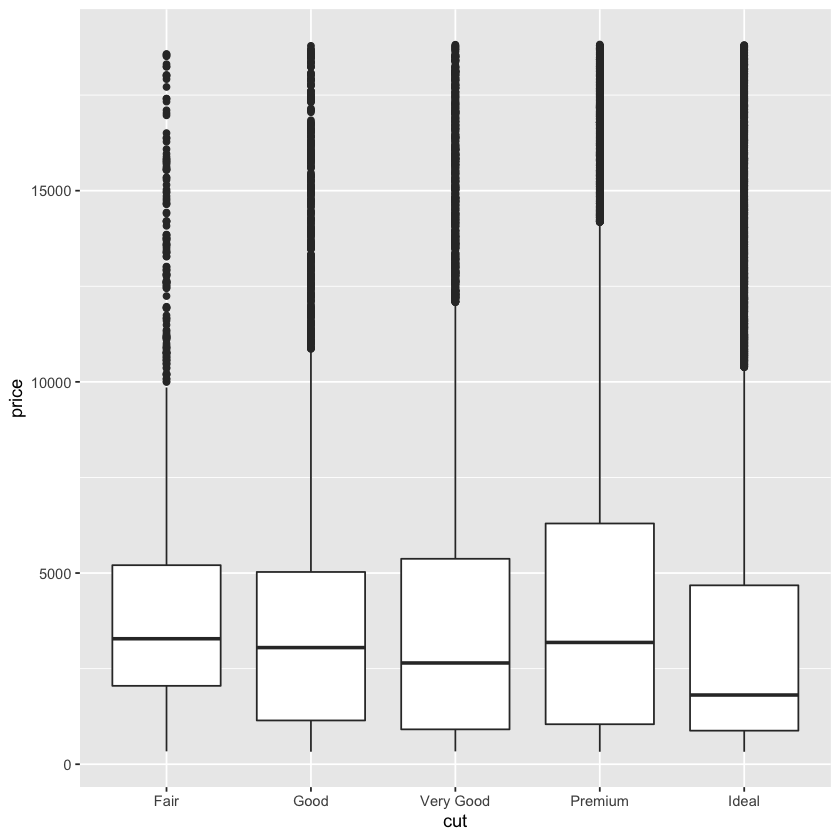

In [24]:
ggplot(diamonds, aes(x=cut, y=price)) + geom_boxplot()

## Two Categorical Variables

To display covariation between two categorical variables: ```geom_count()```

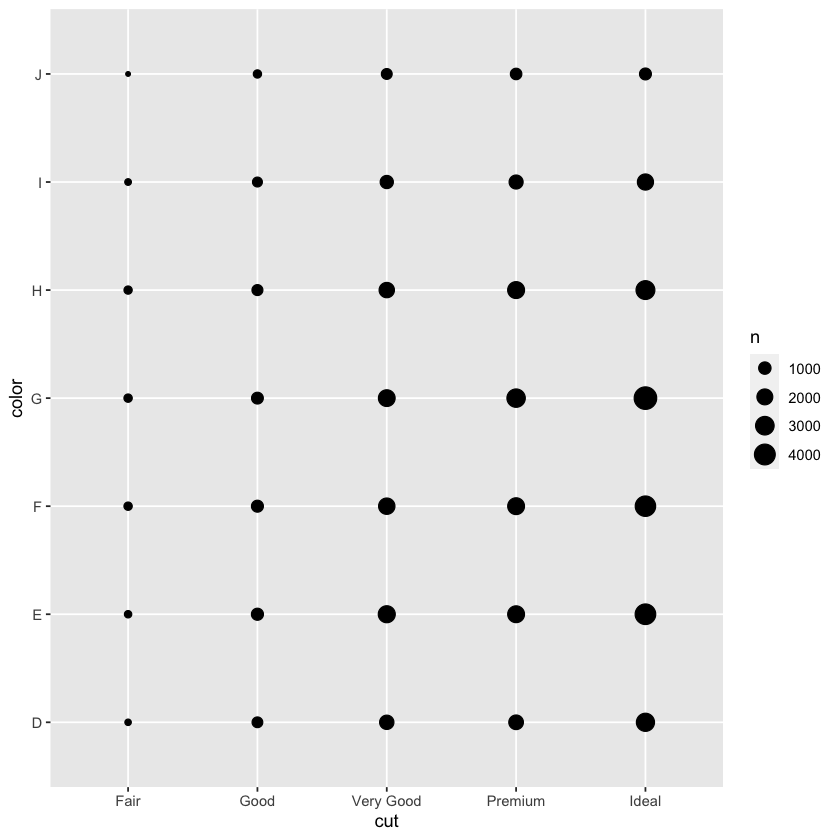

In [26]:
ggplot(diamonds) + geom_count(mapping = aes(x = cut, y = color))

Circle size: how many observations occurred at each combination of values.

Alternatively, to display covariation between two categorical variables: compute the count with ```dplyr```.

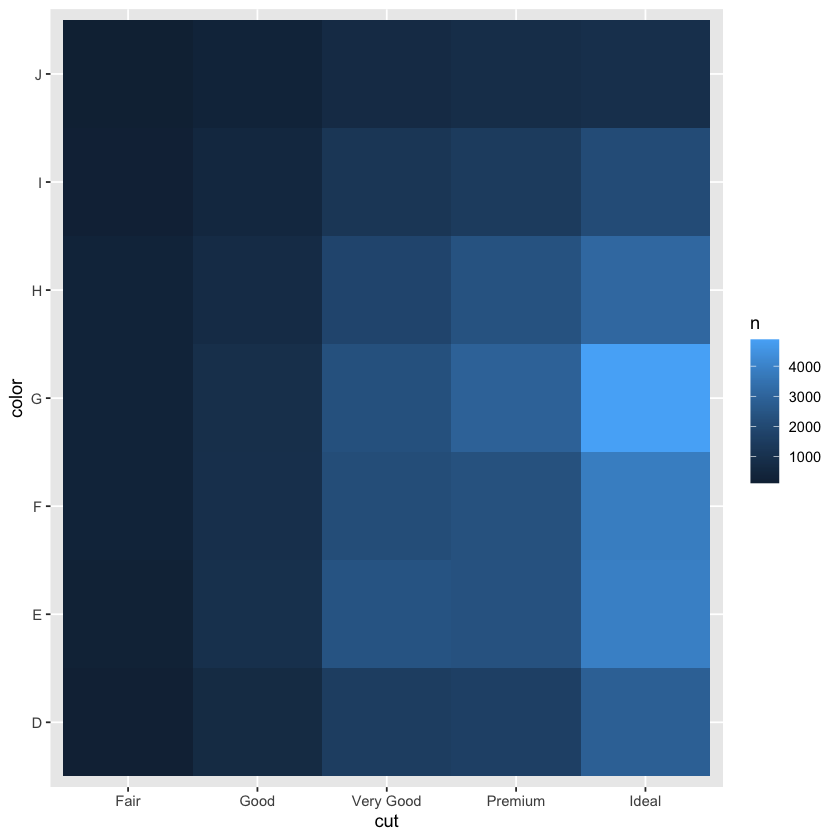

In [27]:
diamonds %>% count(cut, color) %>%
  ggplot(aes(x = cut, y = color)) + geom_tile(aes(fill = n))

![images](images/slides5.png)